## PIMA Indian Diabetes Data - UCI


In [1]:
import pandas as pd

diabetes = pd.read_csv("pima_indians_diabetes.csv",
                       names=['Pregnancies','Glucose','BloodPressure','SkinThickness',
                              'Insulin','BMI','DPF','Age','Outcome'])

print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
diabetes.shape

(768, 9)

## Data Exploration

# 1. Check if the data types are as expected

In [3]:
diabetes.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes['Outcome'] = diabetes['Outcome'].astype('category')
diabetes.dtypes

Pregnancies         int64
Glucose             int64
BloodPressure       int64
SkinThickness       int64
Insulin             int64
BMI               float64
DPF               float64
Age                 int64
Outcome          category
dtype: object

# 2. Check summary statistics

In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,32.000000,0.471924,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.882812,0.331299,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078003,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.296875,0.243774,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372559,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.593750,0.626221,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.125000,2.419922,81.000000


# 3. Check for Outliers

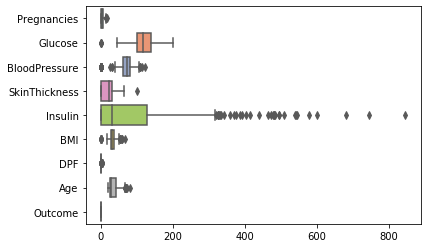

In [11]:
import matplotlib.pylab as plt
import seaborn as sns

sns.boxplot(data=diabetes,orient='h',palette='Set2')
plt.show()

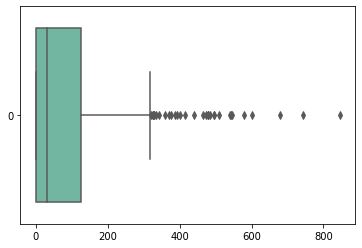

In [12]:
sns.boxplot(data=diabetes['Insulin'],orient='h',palette='Set2')
plt.show()

In [13]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib notebook

# Dealing with Outliers

In [14]:
import numpy as np
q1, q3 = np.percentile(diabetes['Insulin'],[25,75])
iqr = q3-q1
whisker = q3 + (1.5 * iqr)
print(whisker)

318.125


<IPython.core.display.Javascript object>


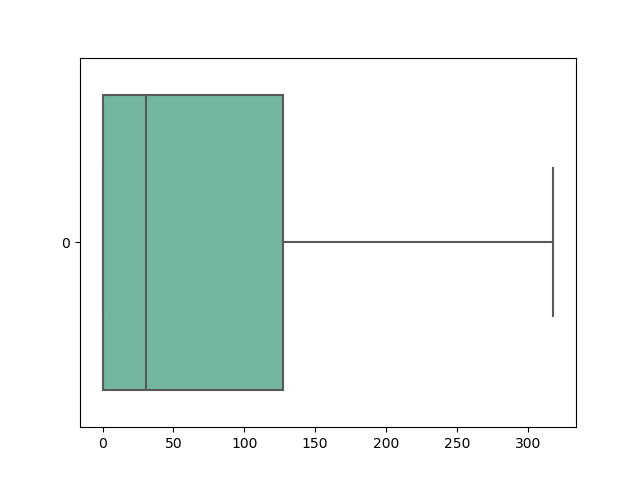

In [15]:
diabetes['Insulin'] = diabetes['Insulin'].clip(upper=whisker)
sns.boxplot(data=diabetes['Insulin'],orient='h',palette='Set2')
plt.show()

# 4. Check missing values

In [16]:
diabetes.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [17]:
(diabetes.iloc[:,[1,2,3,4,5]] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [18]:
## Replacing 0 values with NaN
diabetes.iloc[:,[1,2,3,4,5]] = diabetes.iloc[:,[1,2,3,4,5]].replace(0, np.NaN)

In [19]:
diabetes.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

## Dealing with Missing Values

 # A) Drop rows having NaN

In [20]:
nan_dropped = diabetes.dropna()
nan_dropped.shape

(392, 9)

In [ ]:
Drop row/columns having more than certain percentage of NaNs


In [21]:
## Dropping rows with more than 25% NA values
dropped_diabetes = diabetes.loc[diabetes.isnull().mean(axis=1) < 0.25]
print(dropped_diabetes.shape)

## Dropping cols with more than 30% NA values
dropped_diabetes = dropped_diabetes.loc[:,dropped_diabetes.isnull().mean(axis=0) < 0.30]

(733, 9)


## Decoupling target

In [22]:
y = dropped_diabetes['Outcome']
X = dropped_diabetes[dropped_diabetes.columns.difference(['Outcome'])]

## Train-Test split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 7)
(491,)
(242, 7)
(242,)


## B) Impute missing values


In [25]:
from sklearn.preprocessing import Imputer     ## import constructor
mean_imputer = Imputer(strategy="mean")       ## create object
mean_imputer.fit(X_train)                    ## learn from train data
X_train_imputed = pd.DataFrame(mean_imputer.transform(X_train),columns=X_train.columns)
X_test_imputed = pd.DataFrame(mean_imputer.transform(X_test),columns=X_test.columns)

C:\Users\Navya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## 5. Range Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler     ## import constructor
range_scaler = MinMaxScaler()       ## create object
range_scaler.fit(X_train)                    ## learn from train data
X_train_scaled = pd.DataFrame(range_scaler.transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(range_scaler.transform(X_test),columns=X_test.columns)

## 6. Standardization

In [27]:
from sklearn.preprocessing import StandardScaler     ## import constructor
std_scaler = StandardScaler()       ## create object
std_scaler.fit(X_train)                    ## learn from train data
X_train_std = pd.DataFrame(std_scaler.transform(X_train),columns=X_train.columns)
X_test_std = pd.DataFrame(std_scaler.transform(X_test),columns=X_test.columns)

In [28]:
X_train_std.describe()

,Age,BMI,BloodPressure,DPF,Glucose,Pregnancies,SkinThickness
count,4.910000e+02,4.900000e+02,4.900000e+02,4.910000e+02,4.900000e+02,4.910000e+02,3.740000e+02
mean,-1.189363e-16,3.867654e-16,-3.539119e-16,-2.781210e-17,4.531523e-18,-6.964332e-17,-9.558605e-17
std,1.001020e+00,1.001022e+00,1.001022e+00,1.001020e+00,1.001022e+00,1.001020e+00,1.001340e+00
min,-1.055135e+00,-2.072704e+00,-3.875518e+00,-1.188714e+00,-2.574413e+00,-1.126650e+00,-2.047782e+00
25%,-7.906330e-01,-7.279649e-01,-6.621777e-01,-6.858690e-01,-7.434109e-01,-8.201761e-01,-7.507957e-01
50%,-3.497963e-01,-5.673706e-02,-1.950957e-02,-2.805236e-01,-1.875710e-01,-2.072287e-01,-9.660519e-03
75%,6.200444e-01,6.418878e-01,6.231586e-01,4.770841e-01,6.625372e-01,7.121925e-01,7.083142e-01
max,3.176897e+00,5.075644e+00,3.997166e+00,5.467617e+00,2.493539e+00,4.083404e+00,6.475273e+00


## 7. Binning

In [29]:
bins = [0,25,30,35,40,100]
group_names = ["Malnutritioned","Under-weight","Healthy","Over-weight","Obese"]
diabetes['BMI Class'] = pd.cut(diabetes['BMI'], bins, labels=group_names)

In [30]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,BMI Class
0,6,148.0,72.0,35.0,NaN,33.593750,0.626953,50,1,Healthy
1,1,85.0,66.0,29.0,NaN,26.593750,0.351074,31,0,Under-weight
2,8,183.0,64.0,NaN,NaN,23.296875,0.671875,32,1,Malnutritioned
3,1,89.0,66.0,23.0,94.0,28.093750,0.166992,21,0,Under-weight
4,0,137.0,40.0,35.0,168.0,43.093750,2.287109,33,1,Obese
